<a href="https://colab.research.google.com/github/Mal-web-cmd/Python_Libraries/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv('/content/train_loan (1).csv')

In [3]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

In [7]:
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le




In [8]:
X = data.drop(columns=['Married'])  # Replace 'Target' with the actual target column name
y = data['Married']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        34
           1       0.84      0.90      0.87        89

    accuracy                           0.80       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.80      0.80      0.80       123



In [12]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
print("\nGradient Boosting Results:")
print(classification_report(y_test, gb_preds))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        34
           1       0.85      0.88      0.86        89

    accuracy                           0.80       123
   macro avg       0.75      0.73      0.74       123
weighted avg       0.79      0.80      0.79       123



In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)




GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [14]:
print("\nBest Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf_preds = best_rf.predict(X_test)
print("\nRandom Forest Results after Hyperparameter Tuning:")
print(classification_report(y_test, best_rf_preds))



Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        34
           1       0.86      0.91      0.89        89

    accuracy                           0.83       123
   macro avg       0.79      0.76      0.78       123
weighted avg       0.82      0.83      0.82       123



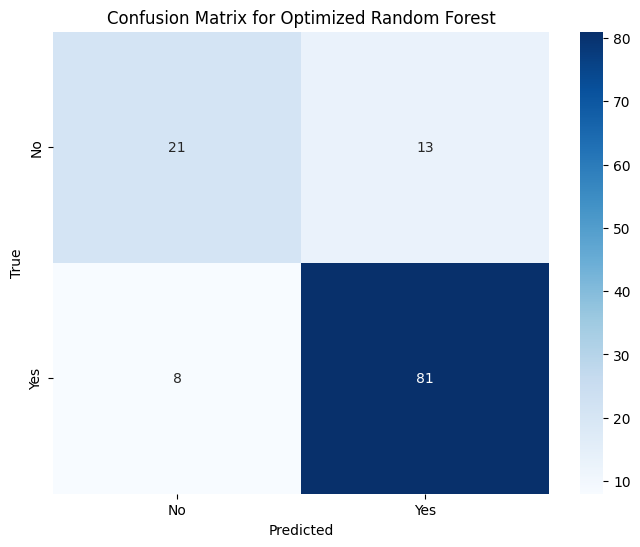

In [18]:
conf_matrix = confusion_matrix(y_test, best_rf_preds) # Changed best_rf_pred to best_rf_preds
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Married'].classes_, yticklabels=label_encoders['Married'].classes_) # Assuming 'Married' is the target column and using label_encoders dictionary
plt.title('Confusion Matrix for Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

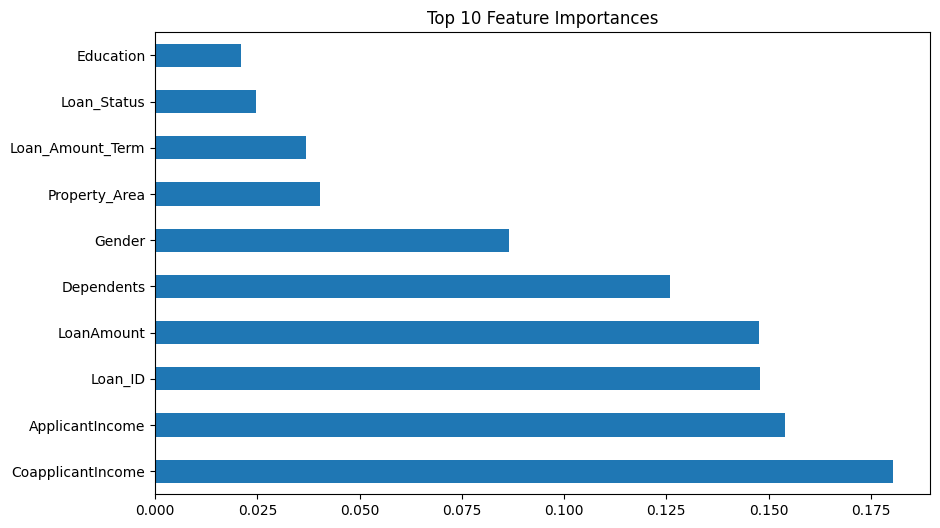

In [19]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()